In [41]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

with open('nrel-pv_plants.json') as f:
    d = json.load(f)

projects = json_normalize(d['features'])
projects.head(3)

,geometry.coordinates,geometry.type,geometry_name,id,properties.cap_mw,properties.city_cnty,properties.developer,properties.elecpurch,properties.gid,properties.landtype,...,properties.net_mtrd,properties.on_date,properties.projname,properties.state,properties.status,properties.tech,properties.x,properties.y,properties.zipcode,type
0,"[-74.25339, 40.633953]",Point,the_geom_4326,pv_plants.1,4.0,Linden,Advanced Solar Products,PSE&G,1,Private,...,None,2010-12-31Z,Linden Solar Farm,NJ,Operating,PV,-74.253390,40.633953,07036,Feature
1,"[-73.145315, 44.435868]",Point,the_geom_4326,pv_plants.2,2.0,South Burlington,AllEarth Renewables,Vermont National Guard,2,Private,...,X,2011-07-27Z,South Burlington Solar Farm,VT,Operating,PV,-73.145315,44.435868,05403,Feature
2,"[-74.65781, 40.168595]",Point,the_geom_4326,pv_plants.3,5.0,Hamilton,American Capital Energy,PSE&G,3,Private,...,None,2011-02-01Z,Yardville Solar Farm,NJ,Operating,PV,-74.657810,40.168595,08620,Feature


In [11]:
projects.columns

Index(['geometry.coordinates', 'geometry.type', 'geometry_name', 'id',
       'properties.cap_mw', 'properties.city_cnty', 'properties.developer',
       'properties.elecpurch', 'properties.gid', 'properties.landtype',
       'properties.link1', 'properties.link2', 'properties.link3',
       'properties.link4', 'properties.link5', 'properties.locaccurac',
       'properties.net_mtrd', 'properties.on_date', 'properties.projname',
       'properties.state', 'properties.status', 'properties.tech',
       'properties.x', 'properties.y', 'properties.zipcode', 'type'],
      dtype='object')

In [12]:
projects.dtypes

geometry.coordinates      object
geometry.type             object
geometry_name             object
id                        object
properties.cap_mw        float64
properties.city_cnty      object
properties.developer      object
properties.elecpurch      object
properties.gid             int64
properties.landtype       object
properties.link1          object
properties.link2          object
properties.link3          object
properties.link4          object
properties.link5          object
properties.locaccurac      int64
properties.net_mtrd       object
properties.on_date        object
properties.projname       object
properties.state          object
properties.status         object
properties.tech           object
properties.x             float64
properties.y             float64
properties.zipcode        object
type                      object
dtype: object

In [13]:
projects['properties.cap_mw'].mean()

8.557131322751323

In [14]:
projects['properties.cap_mw'].std()

20.138040239678947

In [15]:
projects['properties.cap_mw'].max()

250.0

In [16]:
projects['properties.developer'].unique()

array(['Advanced Solar Products', 'AllEarth Renewables',
       'American Capital Energy', 'Arizona Public Service', 'BP Solar',
       'Cleantech America Inc.', 'Con Edison/Panda Energy',
       'SunPower/Conectiv Energy', 'Conergy', 'Cupertino Electric',
       'Efficient Energy of Tennessee', 'Energy Solutions LLC', 'enXco',
       'SunPower', 'ESA Renewables', 'Eurus', 'First Solar',
       'Forest City Hawaii', 'GDF Suez', 'Global Solar Energy',
       'SunPower/Iberdrola', 'J. Fletcher Creamer & Son',
       'juwi Solar Inc.', 'juwi solar Inc.', 'Kyocera Solar',
       'Lincoln Renewable Energy', 'SunPower/LS Power',
       'Main Street Power', 'SunPower/MMA Renewable Ventures',
       'NJR Clean Energy Ventures', 'First Solar/NRG Energy',
       'Oak Leaf Partners', 'PowerPlay Solar', 'REC Solar',
       'Recurrent Energy', 'Regenesis Power LLC',
       'First Solar/Sempra Generation', 'Sempra Generation',
       'Solar Power Inc.', 'Solar Power Partners', 'Solon',
       'Borre

In [17]:
projects.shape

(189, 26)

In [18]:
projects['properties.tech'].unique()

array(['PV', 'Thin-film', None, 'Pv'], dtype=object)

In [19]:
projects['properties.state'].unique()

array(['NJ', 'VT', 'MA', 'AZ', 'CO', 'CA', 'NY', 'PA', 'TN', 'DE', 'NC',
       'OR', 'GA', 'NM', 'HI', 'FL', 'OH', 'TX', 'NV', 'KY', 'IL', 'MD',
       'Nm'], dtype=object)

In [20]:
projects['properties.state'] = projects['properties.state'].apply(lambda x : x.replace('Nm','NM'))

In [25]:
projects['properties.state'].unique()

array(['NJ', 'VT', 'MA', 'AZ', 'CO', 'CA', 'NY', 'PA', 'TN', 'DE', 'NC',
       'OR', 'GA', 'NM', 'HI', 'FL', 'OH', 'TX', 'NV', 'KY', 'IL', 'MD'],
      dtype=object)

In [27]:
projects.columns

Index(['geometry.coordinates', 'geometry.type', 'geometry_name', 'id',
       'properties.cap_mw', 'properties.city_cnty', 'properties.developer',
       'properties.elecpurch', 'properties.gid', 'properties.landtype',
       'properties.link1', 'properties.link2', 'properties.link3',
       'properties.link4', 'properties.link5', 'properties.locaccurac',
       'properties.net_mtrd', 'properties.on_date', 'properties.projname',
       'properties.state', 'properties.status', 'properties.tech',
       'properties.x', 'properties.y', 'properties.zipcode', 'type'],
      dtype='object')

Text(0.5, 1.0, 'Project Capacity (MWdc)')

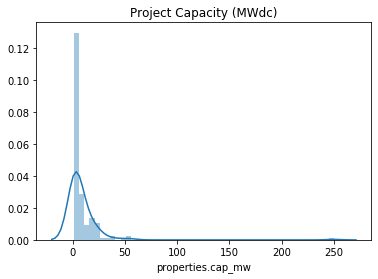

In [47]:
sns.distplot( projects['properties.cap_mw'] )
plt.title('Project Capacity (MWdc)')